Jack Nealon and Ryder Gallagher  
CPSC 222 - Dr. Gina Sprint - Gonzaga University  
12/6/2022

# Quantified Group Project - Music Streaming 
In this report, we are going to analyze Jack's Spotify streaming data with Ryder's Apple streaming data for the past year and calculate statistics from the information. Included in this report, we are able to read in the history, clean it by replacing missing values, categorizing information, and adding additional supplemental information. From this we are then able to calcuate our statistcs and present them visually using tables and graphs.
1. Load the data
2. Clean the data
3. Visualize the data

### 1. Load the Data -----

In [37]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib
importlib.reload(utils) #reloads the kernal automatically

#Read in the raw, unprocessed data into a pandas dataframe
jack_df, ryder_df = utils.read_files()

Information Collected for Jack Includes:
1. Date and Time (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)

Information Collected for Ryder Includes:
1. artist (string)
1. streamable (bool)
1. image (string)
1. mbid (string)
1. album (string)
1. name (string)
1. url (string)
1. date (string)

### 2. Clean the Data -----

In [38]:
jack_df = utils.clean_jack_info(jack_df)
ryder_df = utils.clean_ryder_info(ryder_df)

What are we cleaning: 
1. Splitting columns with multiple values into separate columns (and deleting the combined column we extracted values from)
1. Filling all missing values with the np.nan value
1. Converting values to more understandable units

Information Collected for Jack after cleaning:
1. Year (integer)
1. Month (integer)
1. Day (integer)
1. Time of playing (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)

Information Collected for Ryder after cleaning:
1. Artist (string)
1. Album (string)
1. Track Name (string)
1. Day (integer)
1. Month (integer)
1. Year (integer)

### 3. Aggregate the data and compute summary statistics -----

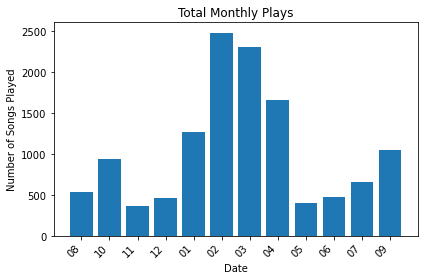

In [39]:
utils.graph_jack_monthly_plays(jack_df)

This graph shows the total number of songs/podcast plays ranging from the beginning of my data (August 2021) to the end of my data (September 2022). Its interesting because I see the trend of listening to a lot of music from december to january and february before slowly stopping listening to as much music. My music habits then drop after april 2022 and slowly increasing from there. Its pretty cool becaue November 2021 was when I switched from the Silver Falls Brewery to The Noble Fox. We can see that I learned without music before taking over and running on autopilot before my leave at around april. I can see what I was doing and can correlate it to my real-life events :D.  

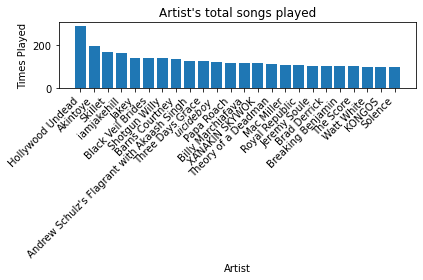

In [40]:
utils.graph_jack_favorite_artists(jack_df)

Yo, I didnt know how much Hollywood undead I listened to... dang. I didnt even go through a phase or a noticeable time where I was playing a crap ton of hollywood undead, the same with iamjakehill. This is weird, even I didnt know what my most played music was but I guess I am major emo boy lol. If I had to make a list having never seen these numbers, I would probably identify probably 10-12 listed which is hilarious. 

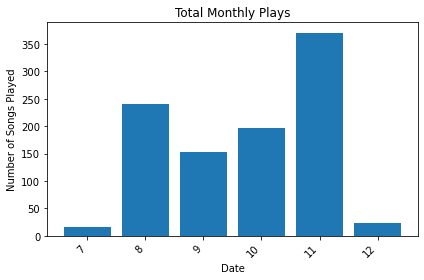

In [41]:
utils.graph_ryder_monthly_plays(ryder_df)

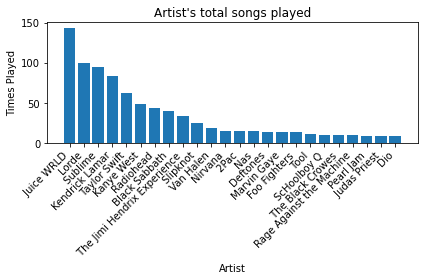

In [42]:
utils.graph_ryder_favorite_artists(ryder_df)

### Hypothesis Testing -----

Question: On average, did Jack listen to more songs per month than Ryder? 

* Step 1: State the null and alternate hypothesis:
    * $H_0$: $Jack \leq Ryder$
    * $H_1$: $Jack > Ryder$

* Step 2: Select the level of significance:
    * $\alpha = 0.025$

* Step 3: Select the appropriate test statistic:
    * two independent samples --> ttest_ind()
    * $t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$


* Step 4: Formulate decision rule:
    * First, let’s find the critical value:
        * Since it's a one tailed test, go to Level of Significance for one-tailed test (alpha = 0.025) in the table. 
        * With df > 120 instances @ .025 significance; we find t = 1.960
        * If t-computed is > 1.960, then Reject $H_0$.
        * If t-computed is <= 1.960, then Reject $H_1$.

In [50]:
jack_avg_df = pd.Series(dtype=int)
jack_avg_df["avg"] = jack_df['Month'].value_counts()
jack_avg_df.reset_index(inplace=True, drop=True)
print(jack_avg_df.value_counts())


[2484, 2312, 1662, 1268, 1050, 942, 658, 535, 477, 461, 399, 369]    1
dtype: int64


In [ ]:
utils.get_jack_kNN(jack_df)

### Save spotify information to csv file -----

In [ ]:
jack_df.to_csv("JackCleanedData.csv")
ryder_df.to_csv("RyderCleanedData.csv")